In [114]:
# Logistic Regression: sample logistic regression model for diabetes prediction 
# Shomik Jain, USC CAIS++

In [115]:
# Classification Problem: predict which of k discrete categories some input belongs to (supervised learning)
# Tutorial: predict diabetes or no diabetes (binary classification) based on health data 

In [116]:
# 1. Import Dataset & Data Pre-Processing
import pandas as pd
headers = ['# pregnant', 'Plasma glucose concentration', 'blood pressure', 'skin fold thickness', 'insulin', \
           'bmi', 'Diabetes pedigree', 'age', 'label']

In [117]:
diabetes_df = pd.read_csv('pima-indians-diabetes.data.txt', names=headers)

In [118]:
diabetes_df.head()

,# pregnant,Plasma glucose concentration,blood pressure,skin fold thickness,insulin,bmi,Diabetes pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
num_features = 8

In [120]:
# binary classification: output of 0 (negative class) or 1 (positive class)
# "1" = diabetes, "0" = no diabetes
labels = diabetes_df['label'].values
print(labels)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [121]:
# Convert output from numerical (0 or 1) to categorical (one-hot vector encoding)
import numpy as np

# convert class vector (integers from 0 to nb_classes) to binary class matrix
# i.e. -- [1 0 1] => [[0 1] [1 0] [0 1]] (useful for multiple classes)
def to_categorical(y, nb_classes):
    y = np.asarray(y, dtype='int32')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    Y[np.arange(len(y)),y] = 1.
    return Y

In [122]:
# Convert diabetes labels to categorical output
# Left column: no diabetes | Right column: has diabetes

labels = to_categorical(labels,2)
labels = labels.astype(np.float32, copy = False)
print(labels)
print(labels.shape)

[[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]
(768, 2)


In [123]:
# Extract feature vectors array from the pandas dataframe
data = diabetes_df.iloc[:,:8].values
data = data.astype(np.float32, copy = False)
print(data.shape)

(768, 8)


In [124]:
# Feature Scaling & Mean Normalization (speeds up optimization)
# => getting every feature into [-1, 1] with mean 0

for i in range(num_features):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

print(data)

[[ 0.12676165  0.13620839  0.02372567 ...,  0.02395559  0.06410069
   0.20690264]
 [-0.167356   -0.18037453 -0.02545466 ..., -0.08036629 -0.04994887
  -0.02766527]
 [ 0.24440873  0.31208777 -0.0418481  ..., -0.12954664  0.08269574
  -0.01531959]
 ..., 
 [ 0.06793812  0.00052999  0.02372567 ..., -0.08632754 -0.09375053
  -0.04001095]
 [-0.167356    0.02565562 -0.07463499 ..., -0.02820534 -0.05077532
   0.16986559]
 [-0.167356   -0.14017352  0.00733222 ..., -0.02373441 -0.06482492
  -0.12643071]]


In [125]:
# Train-test split: assess model using test partition, data the model hasn't seen
train_x = data[:700]
train_y = labels[:700]
test_x = data[700:]
test_y = labels[700:]
print(test_y.shape)

(68, 2)


In [126]:
# 2. Create Logistic Regression Model using TensorFlow
import tensorflow as tf

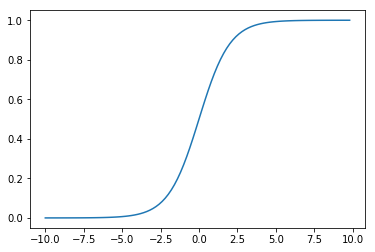

In [127]:
# Sigmoid Function: S-shaped function that squashes input between 0 and 1 
import math
import matplotlib.pyplot as plt
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x_vals = np.arange(-10., 10., 0.2)
sig = sigmoid(x_vals)
plt.plot(x_vals,sig)
plt.show()

In [128]:
# Set up the TensorFlow variables (Add variables to TensorFlow's computational graph)

# Reset the graph
tf.reset_default_graph()

# Input placeholder (8 features)
x = tf.placeholder(tf.float32, [None, 8])    

# Weights Variable (xavier initializer -- random values centered around zero)
W = tf.get_variable("W", shape=[8, 2], initializer = tf.contrib.layers.xavier_initializer())

# Biases variable: initialized to zero
b = tf.Variable(tf.zeros([2]))
    
# Define hypothesis fxn (y): represents probability of possible outputs given inputs
# Uses the softmax activation function: like sigmoid, but makes sure probabiltiies add to 1    
y = tf.nn.softmax(tf.matmul(x, W)+b)

# y_: actual labels
y_ = tf.placeholder(tf.float32, [None, 2])

In [129]:
# 3. Training the Model 
# Find best possible hypothesis function <=> find weights that minimize cost function

In [130]:
# Logistic Regression Cost Function: Cross-Entropy Loss
# cost increases as predicted probability diverges from actual label 
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [131]:
# Optimization -- Batch Gradient Descent
# at each step, use a random subset from the training set
# instead of traditional gradient descent, which looks at every example at every step 
def generate_batch(batch_size):
    indexes = np.random.randint(699, size = (batch_size,))
    return train_x[indexes], train_y[indexes]

In [132]:
# Training 
# TensorFlow automatically takes care of the gradient calculations
train_step = tf.train.GradientDescentOptimizer(.01).minimize(loss) # ".01" specifies the learning rate
sess = tf.InteractiveSession() # create the sesion object
tf.global_variables_initializer().run() # initialize variables

In [133]:
# Run gradient descent
for i in range(10000):
    # get the x training batch and y training batch
    batch_xs, batch_ys = generate_batch(100) 
    
    # this evaluates the computational graph
    # passes batch_xs in for the x placeholder, batch_ys in for the y_ placeholder
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) 

In [134]:
# 4. Evaluate the Model 

In [135]:
# list of booleans: whether each each example's highest predicted value matches actual value
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# take the average over that list to calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

In [136]:
# Evaluate accuracy on test set
print(sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))

0.779412
